# Kyle Burt
## 4 New NHL Divisions Due to Covid-19 and Their Performance eThe NHL was forced to created 4 divisions to geographically split up the teams. The North division comprised of all the Canadian teams was seen as the “weakest” division. I want to put this to the test, I will do this through comparing the North Divisions stats described below, and the other three American divisions seen as the “stronger” divisions.  his will be able to provide clarity on if Covid-19 divisions affect outcomes of the NHL.e.

In [6]:
import pandas as pd
data = pd.read_csv("../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
data

,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,SCF,SCA,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,Limited ReportFull Report,45.583333,33,34,49.25,19,24,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,Limited ReportFull Report,45.583333,34,33,50.75,24,19,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,Limited ReportFull Report,50.683333,44,43,50.57,11,22,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,Limited ReportFull Report,50.683333,43,44,49.43,22,11,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,Limited ReportFull Report,48.600000,47,52,47.47,25,30,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,Limited ReportFull Report,40.966667,32,50,39.02,17,19,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,Limited ReportFull Report,47.416667,43,37,53.75,25,17,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,Limited ReportFull Report,47.416667,37,43,46.25,17,25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,Limited ReportFull Report,44.483333,43,35,55.13,30,18,62.50,24.00,94.44,1.184


# Task 1: Conduct a EDA

In [13]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
print(f"There are {data.shape} rows and columns in the data")
print(f"The columns in the data set are:  {data.columns}")

There are (1736, 13) rows and columns in the data
The columns in the data set are:  Index(['Game', 'Team', 'Unnamed: 2', 'TOI', 'CF', 'CA', 'CF%', 'SCF', 'SCA',
       'SCF%', 'SH%', 'SV%', 'PDO'],
      dtype='object')


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TOI,1736.0,48.557661,4.241102,31.783333,45.6625,48.933333,51.500,68.200
CF,1736.0,42.956221,9.312960,19.000000,36.0000,43.000000,49.000,78.000
CA,1736.0,42.956221,9.312960,19.000000,36.0000,43.000000,49.000,78.000
CF%,1736.0,50.000035,8.153142,25.270000,44.1600,50.000000,55.840,74.730
SCF,1736.0,20.467166,6.146442,4.000000,16.0000,20.000000,24.000,48.000
SCA,1736.0,20.467166,6.146442,4.000000,16.0000,20.000000,24.000,48.000
SCF%,1736.0,50.000063,10.623748,14.810000,43.1700,50.000000,56.830,85.190
SH%,1736.0,8.458710,6.235143,0.000000,4.1700,7.690000,12.500,50.000
SV%,1736.0,91.541394,6.235157,50.000000,87.5000,92.310000,95.830,100.000
PDO,1736.0,1.000009,0.091223,0.553000,0.9420,1.000000,1.058,1.447


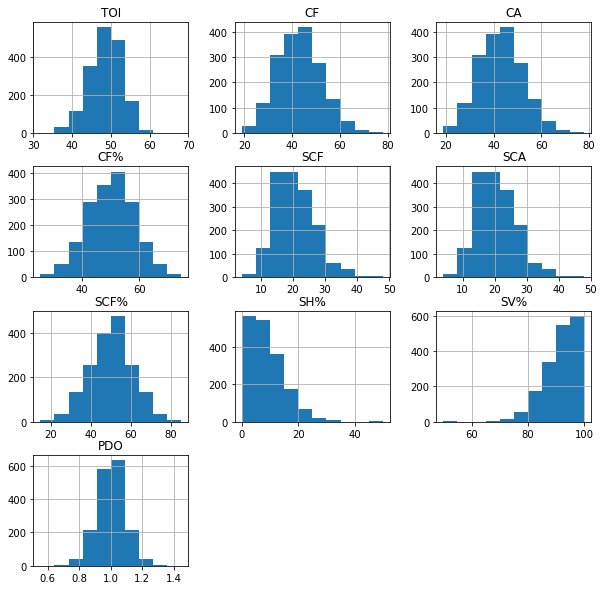

In [15]:
hist= data.hist(bins=10, figsize=(10,10))

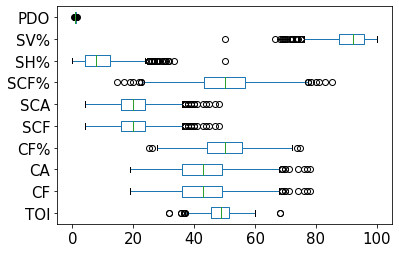

In [19]:
boxplot = data.boxplot(grid=False, vert=False,fontsize=15)

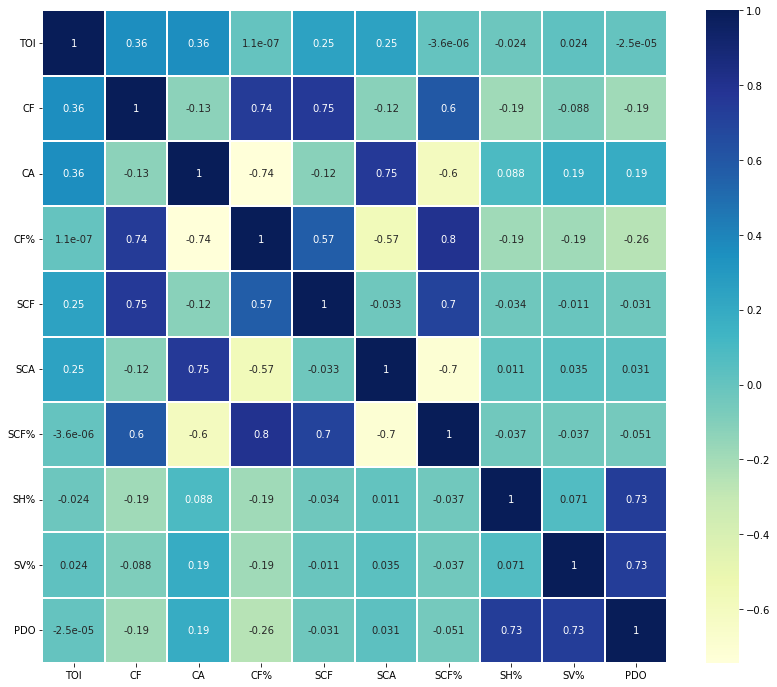

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# Task 2: Analysis Pipeline 

In [22]:
df = data.drop(columns = ['CF', 'CA' , 'SCF' , 'SCA' , 'Unnamed: 2']) 
df

,Game,Team,TOI,CF%,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,45.583333,49.25,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,45.583333,50.75,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,50.683333,50.57,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,50.683333,49.43,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,48.600000,47.47,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,40.966667,39.02,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,47.416667,53.75,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,47.416667,46.25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,44.483333,55.13,62.50,24.00,94.44,1.184


##
- I have decided to drop the columns of CF,CA,SCF,SCA, and Unnamed: 2 as many of our stats are combined to produce a percentage, which will be more useful. 

# North Division (only Canadian teams) 

In [30]:
northdiv = df.drop(data[data.Team.isin([ "Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", 
                                        "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers",
                                        "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning",
                                        "St Louis Blues", "Vegas Golden Knights", "New Jersey Devils", "New York Islanders", "New York Rangers", "Philadelphia Flyers", 
                                        "Washington Capitals", "Anaheim Ducks"])].index)
northdiv

,Game,Team,TOI,CF%,SCF%,SH%,SV%,PDO
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,48.600000,47.47,45.45,9.09,90.00,0.991
5,"2021-01-13 - Canadiens 4, Maple Leafs 5",Toronto Maple Leafs,48.600000,52.53,54.55,10.00,90.91,1.009
6,"2021-01-13 - Canucks 5, Oilers 3",Edmonton Oilers,47.583333,41.76,45.83,12.00,83.87,0.959
7,"2021-01-13 - Canucks 5, Oilers 3",Vancouver Canucks,47.583333,58.24,54.17,16.13,88.00,1.041
14,"2021-01-14 - Canucks 2, Oilers 5",Edmonton Oilers,44.550000,44.14,45.28,8.33,93.33,1.017
...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,40.966667,39.02,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,47.416667,53.75,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,47.416667,46.25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,44.483333,55.13,62.50,24.00,94.44,1.184


In [27]:
northdiv1 = northdiv.reset_index()
northdiv1

,index,Game,Team,TOI,CF%,SCF%,SH%,SV%,PDO
0,4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,48.600000,47.47,45.45,9.09,90.00,0.991
1,5,"2021-01-13 - Canadiens 4, Maple Leafs 5",Toronto Maple Leafs,48.600000,52.53,54.55,10.00,90.91,1.009
2,6,"2021-01-13 - Canucks 5, Oilers 3",Edmonton Oilers,47.583333,41.76,45.83,12.00,83.87,0.959
3,7,"2021-01-13 - Canucks 5, Oilers 3",Vancouver Canucks,47.583333,58.24,54.17,16.13,88.00,1.041
4,14,"2021-01-14 - Canucks 2, Oilers 5",Edmonton Oilers,44.550000,44.14,45.28,8.33,93.33,1.017
...,...,...,...,...,...,...,...,...,...
387,1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,40.966667,39.02,47.22,8.70,78.26,0.870
388,1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,47.416667,53.75,59.52,3.33,86.36,0.897
389,1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,47.416667,46.25,40.48,13.64,96.67,1.103
390,1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,44.483333,55.13,62.50,24.00,94.44,1.184


# Calgary Flames

In [49]:
#northdiv1['Team']
CGY1 = northdiv1[northdiv1['Team'] == 'Calgary Flames'] #, how to find just one teams entire stats 
CGY = CGY.reset_index()
CGY
#CGY.select_dtypes(include='number').sum()

ValueError: cannot insert level_0, already exists

In [43]:
EDM1 = northdiv1[northdiv1['Team'] == 'Edmonton Oilers'] #, how to find just one teams entire stats 
EDM = EDM1.reset_index()
EDM

,level_0,index,Game,Team,TOI,CF%,SCF%,SH%,SV%,PDO
0,2,6,"2021-01-13 - Canucks 5, Oilers 3",Edmonton Oilers,47.583333,41.76,45.83,12.00,83.87,0.959
1,4,14,"2021-01-14 - Canucks 2, Oilers 5",Edmonton Oilers,44.550000,44.14,45.28,8.33,93.33,1.017
2,10,44,"2021-01-16 - Canadiens 5, Oilers 1",Edmonton Oilers,51.416667,53.00,54.55,4.00,89.29,0.933
3,16,68,"2021-01-18 - Canadiens 3, Oilers 1",Edmonton Oilers,36.766667,42.86,33.33,0.00,95.00,0.950
4,26,102,"2021-01-20 - Oilers 3, Maple Leafs 1",Edmonton Oilers,46.300000,43.75,50.00,5.56,93.33,0.989
5,32,124,"2021-01-22 - Oilers 2, Maple Leafs 4",Edmonton Oilers,51.733333,50.55,50.00,3.85,95.45,0.993
6,40,156,"2021-01-24 - Oilers 4, Jets 3",Edmonton Oilers,49.283333,46.55,49.18,12.50,94.44,1.069
7,46,184,"2021-01-26 - Oilers 4, Jets 6",Edmonton Oilers,48.966667,47.14,38.89,5.26,81.82,0.871
8,52,212,"2021-01-28 - Maple Leafs 4, Oilers 3",Edmonton Oilers,39.300000,56.76,48.72,4.76,87.50,0.923
9,60,242,"2021-01-30 - Maple Leafs 3, Oilers 4",Edmonton Oilers,54.483333,57.14,57.89,7.69,91.67,0.994


In [44]:
TOR1 = northdiv1[northdiv1['Team'] == 'Toronto Maple Leafs'] #, how to find just one teams entire stats 
TOR = TOR1.reset_index()
TOR

,level_0,index,Game,Team,TOI,CF%,SCF%,SH%,SV%,PDO
0,1,5,"2021-01-13 - Canadiens 4, Maple Leafs 5",Toronto Maple Leafs,48.600000,52.53,54.55,10.00,90.91,1.009
1,9,37,"2021-01-15 - Maple Leafs 3, Senators 5",Toronto Maple Leafs,41.166667,48.61,47.37,5.88,83.33,0.892
2,15,55,"2021-01-16 - Maple Leafs 3, Senators 2",Toronto Maple Leafs,44.600000,71.79,68.29,7.69,85.71,0.934
3,20,76,"2021-01-18 - Jets 1, Maple Leafs 3",Toronto Maple Leafs,46.383333,60.49,70.00,3.85,94.44,0.983
4,27,103,"2021-01-20 - Oilers 3, Maple Leafs 1",Toronto Maple Leafs,46.300000,56.25,50.00,6.67,94.44,1.011
5,33,125,"2021-01-22 - Oilers 2, Maple Leafs 4",Toronto Maple Leafs,51.733333,49.45,50.00,4.55,96.15,1.007
6,39,155,"2021-01-24 - Maple Leafs 3, Flames 2",Toronto Maple Leafs,46.666667,42.86,43.48,7.69,95.65,1.033
7,45,183,"2021-01-26 - Maple Leafs 4, Flames 3",Toronto Maple Leafs,50.516667,41.98,43.48,17.65,91.30,1.090
8,53,213,"2021-01-28 - Maple Leafs 4, Oilers 3",Toronto Maple Leafs,39.300000,43.24,51.28,12.50,95.24,1.077
9,61,243,"2021-01-30 - Maple Leafs 3, Oilers 4",Toronto Maple Leafs,54.483333,42.86,42.11,8.33,92.31,1.006
